In [1]:
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
salaries=pd.read_csv('mlbsalaries.csv')

Find the year wise highest salaries piad to pitchers by each team:

In [3]:
salaries.head()

,Year,Player,Salary,Position,Team
0,1988,Mike Witt,1400000,Pitcher,Los Angeles Angels
1,1988,George Hendrick,989333,Outfielder,Los Angeles Angels
2,1988,Chili Davis,950000,Outfielder,Los Angeles Angels
3,1988,Brian Downing,900000,Designated Hitter,Los Angeles Angels
4,1988,Bob Boone,883000,Catcher,Los Angeles Angels


In [4]:
pitcher_max=pd.DataFrame()
salaries=salaries[salaries['Position']=='Catcher']
salaries=salaries.reindex(np.random.permutation(salaries.index))
#we want an object that contains clusters of the same values of an attribute:
grouped_year=salaries.groupby('Year') 
#now we want each data frame of the grouped year object to be clustered teamwise:
for year,df_year in grouped_year:
    grouped_position=df_year.groupby('Team')
#now, for each dataframe value of the grouped_team object, we want to find the maximum ssalary and append it into a new df:
    for position,df_position in grouped_position:
        df_position=df_position.sort_values(by='Salary',ascending=False)
        pitcher_max=pitcher_max.append(df_position.iloc[0,:])

In [5]:
pitcher_max.head()

,Player,Position,Salary,Team,Year
106,Ozzie Virgil,Catcher,900000.0,Atlanta Braves,1988.0
375,Terry Kennedy,Catcher,850000.0,Baltimore Orioles,1988.0
533,Rich Gedman,Catcher,952727.0,Boston Red Sox,1988.0
186,Jody Davis,Catcher,1108333.0,Chicago Cubs,1988.0
633,Carlton Fisk,Catcher,700000.0,Chicago White Sox,1988.0


In [6]:
sales=pd.read_excel('storesales.xlsx')

In [18]:
#Find the maximum sales for each province:
maximum_province_sales=pd.DataFrame()
for province,df_province in sales.groupby('Province'):
    maximum_province_sales=maximum_province_sales.append(df_province.sort_values(by='Sales',ascending=False).iloc[0,:])
maximum_province_sales.head()

,Customer Segment,Order Date,Order ID,Order Priority,Order Quantity,Product Category,Product Container,Product Sub-Category,Province,Sales,Ship Date,Ship Mode,Shipping Cost
6908,Consumer,2010-01-03,29058.0,High,33.0,Furniture,Jumbo Box,Bookcases,Alberta,28389.14,2010-01-05,Delivery Truck,44.55
1294,Corporate,2010-01-09,32932.0,Low,49.0,Technology,Large Box,Copiers and Fax,British Columbia,29884.60,2010-01-13,Regular Air,24.49
3519,Corporate,2011-11-19,37252.0,Low,34.0,Furniture,Jumbo Box,Bookcases,Manitoba,29345.27,2011-11-24,Delivery Truck,44.55
1405,Consumer,2009-03-21,29766.0,Medium,13.0,Technology,Large Box,Office Machines,New Brunswick,89061.05,2009-03-22,Regular Air,24.49
6191,Consumer,2010-03-12,42884.0,Not Specified,29.0,Furniture,Jumbo Box,Tables,Newfoundland,12098.87,2010-03-12,Delivery Truck,42.52


In [8]:
#find the top 3 sales for each product sub category:
df_subcat_sales=pd.DataFrame()
for subcat,df_subcat in sales.groupby('Product Sub-Category'):
    df_subcat=df_subcat.sort_values(by='Sales',ascending=False)
    df_subcat_sales=df_subcat_sales.append(df_subcat.iloc[0:3,:])
df_subcat_sales.head()

,Order ID,Order Date,Order Priority,Order Quantity,Sales,Ship Mode,Shipping Cost,Province,Customer Segment,Product Category,Product Sub-Category,Product Container,Ship Date
1949,7427,2012-12-15,Not Specified,47,16002.29,Regular Air,19.99,British Columbia,Corporate,Office Supplies,Appliances,Small Box,2012-12-15
2540,36482,2011-07-05,Medium,47,14588.28,Delivery Truck,91.05,Alberta,Small Business,Office Supplies,Appliances,Jumbo Drum,2011-07-06
6429,24579,2012-11-18,High,45,13921.60,Regular Air,24.49,Ontario,Small Business,Office Supplies,Appliances,Large Box,2012-11-19
8213,3841,2009-10-04,Not Specified,20,25409.63,Regular Air,19.99,Quebec,Small Business,Office Supplies,Binders and Binder Accessories,Small Box,2009-10-06
6832,19010,2009-06-07,Low,18,23792.93,Regular Air,19.99,Northwest Territories,Small Business,Office Supplies,Binders and Binder Accessories,Small Box,2009-06-09


In [66]:
#find the maximum sales for each shipping mode:
max_mode_sales=pd.DataFrame()
for mode,df_mode in sales.groupby('Ship Mode'):
    max_mode_sales=max_mode_sales.append(df_mode.sort_values(by=['Sales'],ascending=False).iloc[0:3])
max_mode_sales.head()

,Order ID,Order Date,Order Priority,Order Quantity,Sales,Ship Mode,Shipping Cost,Province,Customer Segment,Product Category,Product Sub-Category,Product Container,Ship Date
3519,37252,2011-11-19,Low,34,29345.27,Delivery Truck,44.55,Manitoba,Corporate,Furniture,Bookcases,Jumbo Box,2011-11-24
3593,34663,2011-07-06,Not Specified,38,29186.49,Delivery Truck,55.30,Saskachewan,Corporate,Technology,Office Machines,Jumbo Drum,2011-07-08
6908,29058,2010-01-03,High,33,28389.14,Delivery Truck,44.55,Alberta,Consumer,Furniture,Bookcases,Jumbo Box,2010-01-05
2454,45347,2010-09-29,Medium,41,24051.49,Express Air,24.49,Ontario,Corporate,Technology,Copiers and Fax,Large Box,2010-10-01
6846,23168,2010-09-15,Low,46,23949.51,Express Air,24.49,Yukon,Home Office,Technology,Copiers and Fax,Large Box,2010-09-22


In [67]:
#for each customer segment find the maximum sales:
sales=pd.read_excel('storesales.xlsx')
max_cust_sales=pd.DataFrame()
#for each dataframe value, we sort it by the sales attribute in the descending order and append the topmost row:
for segt,df_segt in sales.groupby('Customer Segment'):
    max_cust_sales=max_cust_sales.append(df_segt.sort_values(by=['Sales'],ascending='False').iloc[0:3,:])
max_cust_sales.head()

,Order ID,Order Date,Order Priority,Order Quantity,Sales,Ship Mode,Shipping Cost,Province,Customer Segment,Product Category,Product Sub-Category,Product Container,Ship Date
3361,2209,2012-07-09,High,1,5.68,Regular Air,0.88,Ontario,Consumer,Office Supplies,Paper,Wrap Bag,2012-07-10
4742,52322,2010-02-02,Low,1,5.70,Regular Air,2.00,Ontario,Consumer,Office Supplies,Rubber Bands,Wrap Bag,2010-02-09
5983,33571,2011-10-11,Medium,1,7.15,Regular Air,2.03,Manitoba,Consumer,Furniture,Office Furnishings,Wrap Bag,2011-10-14
2556,6374,2011-08-07,Critical,1,2.24,Regular Air,0.70,British Columbia,Corporate,Office Supplies,Rubber Bands,Wrap Bag,2011-08-09
1384,23361,2010-07-03,Critical,2,3.23,Regular Air,0.70,Yukon,Corporate,Office Supplies,Rubber Bands,Wrap Bag,2010-07-04


In [28]:
#for each order priority find the highest sales:
sales_priority=pd.DataFrame()
for priority,df_priority in sales.groupby('Order Priority'):
    sales_priority=sales_priority.append(df_priority.sort_values(by=['Sales'],ascending=False).iloc[0,:])
sales_priority

,Customer Segment,Order Date,Order ID,Order Priority,Order Quantity,Product Category,Product Container,Product Sub-Category,Province,Sales,Ship Date,Ship Mode,Shipping Cost
4627,Corporate,2012-05-21,30343.0,Critical,8.0,Technology,Large Box,Office Machines,Saskachewan,41343.21,2012-05-23,Regular Air,24.49
2491,Small Business,2011-03-15,20967.0,High,50.0,Technology,Large Box,Copiers and Fax,Manitoba,28664.52,2011-03-15,Regular Air,24.49
1294,Corporate,2010-01-09,32932.0,Low,49.0,Technology,Large Box,Copiers and Fax,British Columbia,29884.60,2010-01-13,Regular Air,24.49
1405,Consumer,2009-03-21,29766.0,Medium,13.0,Technology,Large Box,Office Machines,New Brunswick,89061.05,2009-03-22,Regular Air,24.49
921,Small Business,2012-12-01,14435.0,Not Specified,9.0,Technology,Large Box,Copiers and Fax,Quebec,33367.85,2012-12-04,Regular Air,24.49


In [69]:
def select_top(dataframe,input_attr,target_attr,rank,order):
    resultant_df=pd.DataFrame()
    for attr,df_attr in dataframe.groupby(input_attr):
        resultant_df=resultant_df.append(df_attr.sort_values(by=target_attr,ascending=order).iloc[0:rank,:])
    return resultant_df.head(2*rank)

In [70]:
select_top(dataframe=sales,input_attr='Product Category',target_attr='Sales',rank=5,order=False)

,Order ID,Order Date,Order Priority,Order Quantity,Sales,Ship Mode,Shipping Cost,Province,Customer Segment,Product Category,Product Sub-Category,Product Container,Ship Date
3519,37252,2011-11-19,Low,34,29345.27,Delivery Truck,44.55,Manitoba,Corporate,Furniture,Bookcases,Jumbo Box,2011-11-24
6908,29058,2010-01-03,High,33,28389.14,Delivery Truck,44.55,Alberta,Consumer,Furniture,Bookcases,Jumbo Box,2010-01-05
7827,13636,2009-01-22,Low,32,28180.08,Delivery Truck,44.55,Nova Scotia,Home Office,Furniture,Bookcases,Jumbo Box,2009-01-26
4992,51203,2011-12-21,High,49,26622.55,Delivery Truck,45.70,Nova Scotia,Home Office,Furniture,Tables,Jumbo Box,2011-12-22
6754,23488,2009-01-06,Critical,30,26133.39,Delivery Truck,44.55,Northwest Territories,Home Office,Furniture,Bookcases,Jumbo Box,2009-01-07
8213,3841,2009-10-04,Not Specified,20,25409.63,Regular Air,19.99,Quebec,Small Business,Office Supplies,Binders and Binder Accessories,Small Box,2009-10-06
6832,19010,2009-06-07,Low,18,23792.93,Regular Air,19.99,Northwest Territories,Small Business,Office Supplies,Binders and Binder Accessories,Small Box,2009-06-09
5409,56740,2012-10-16,Low,29,23516.31,Regular Air,24.49,British Columbia,Consumer,Office Supplies,"Scissors, Rulers and Trimmers",Medium Box,2012-10-20
7818,41728,2009-09-30,High,28,23106.46,Regular Air,19.99,Ontario,Corporate,Office Supplies,Binders and Binder Accessories,Small Box,2009-10-02
4893,7203,2009-01-08,High,25,21752.01,Regular Air,19.99,Alberta,Corporate,Office Supplies,Binders and Binder Accessories,Small Box,2009-01-10


Text(0.5,0,'category')

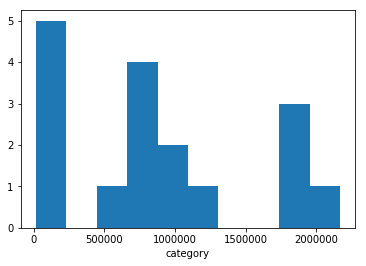

In [65]:
#plot bar chart of total sales for each product category:
categories=[]
total_sales=[]
for prod_cat,df_prod_cat in sales.groupby('Product Sub-Category'):
    categories.append(prod_cat)
    total_sales.append(df_prod_cat['Sales'].sum())
plt.hist(total_sales)
plt.xlabel('category')